Here I will plot the optimized F function, assuming the beetles aggregate optimally within a grid cell. The main point will be to show how k changes and what F looks like, and then to show how changes in kmin and kmax affect F.

In [1]:
import spatialfunctions as sf
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'serif'

# Make plot colors and things to make it easier to be consistent
cmap = plt.cm.get_cmap('Greens').reversed()

# Figsize consistent
figsize = (3,3)

/var/folders/l1/prbyqvgx4mg745chvp4d8x3r0000gn/T/ipykernel_20314/4279713805.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens').reversed()


In [3]:
# Set params
#s = 0.99
#N = 60
c = 1300
p = 250

# For when we vary p
plist = np.arange(100,625,25)
plen = len(plist)

# Get the list of functions. Do this as a dictionary where the keys are the p values
foptlist = {}
mlist = {}
klist = {}
for pp in plist:
    foptlist[pp],mlist[pp],klist[pp] = sf.getfopt(pp,c,returnk=True)

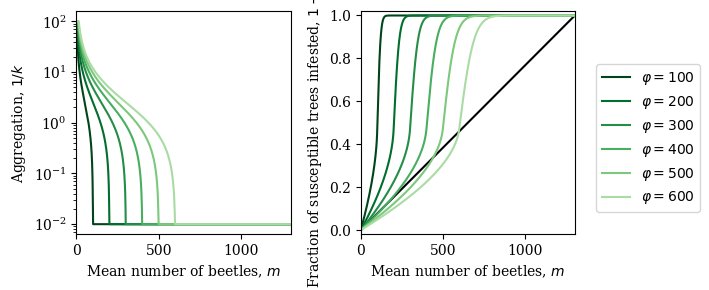

In [5]:
# Plot
fig,axs = plt.subplots(1,2,figsize=(figsize[0]*2.4,figsize[0]),tight_layout = True)
# Get colormap for p's
cdiscrete = cmap(np.linspace(0, 1, plen+3))
for i,pp in enumerate(plist[::4]):
    axs[0].semilogy(mlist[pp],1/klist[pp],c=cdiscrete[i*3])
    axs[1].plot(mlist[pp],1-foptlist[pp](mlist[pp]),c=cdiscrete[i*3],label=r'$\varphi={:.0f}$'.format(pp))
axs[1].plot(mlist[pp],mlist[pp]/c,c='k',zorder=-99)
for ax in axs:
    ax.set_xlim(0,c)
    ax.set_xlabel(r'Mean number of beetles, $m$')
axs[0].set_ylabel(r'Aggregation, $1/k$')
axs[1].set_ylabel(r'Fraction of susceptible trees infested, $1-F(m)$')
axs[1].set_ylim(-0.02,1.02)
axs[1].legend(loc=(1.1,0.1))
plt.savefig('figures/optimizedF.pdf',bbox_inches='tight')

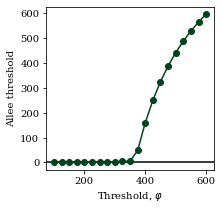

In [21]:
# Plot Allee threshold
fig,ax = plt.subplots(1,1,figsize=figsize)

mallee = []
for pp in plist:
    # Find Allee threshold
    mallee.append(opt.root_scalar(lambda x: x/c - 1 + foptlist[pp](x),bracket=[1e-3,3*c/4]).root)
ax.plot(plist,mallee,'o-',c=cdiscrete[0])
ax.axhline(0,c='k',zorder=-99)
ax.set_ylabel('Allee threshold')
ax.set_xlabel(r'Threshold, $\varphi$')
fig.savefig('figures/allee_threshold.pdf',bbox_inches='tight')

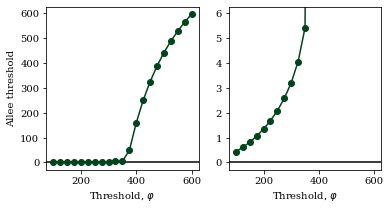

In [18]:
# Plot Allee threshold with smaller y-axis as well
fig,axs = plt.subplots(1,2,figsize=(figsize[0]*2,figsize[0]))

axs[0].plot(plist,mallee,'o-',c=cdiscrete[0])
axs[0].set_ylabel('Allee threshold')
xlim0 = axs[0].get_xlim()
ylim0 = axs[0].get_ylim()
axs[1].plot(plist,mallee,'o-',c=cdiscrete[0])
axs[1].set_ylim([y0*0.01 for y0 in ylim0])
axs[1].set_xlim(xlim0)
for ax in axs:
    ax.axhline(0,c='k',zorder=-99)
    ax.set_xlabel(r'Threshold, $\varphi$')
fig.savefig('figures/allee_threshold_alt.pdf',bbox_inches='tight')

In [19]:
# kmin and kmax
kminlist = np.logspace(-3,0,num=4)
kmaxlist = np.logspace( 1,4,num=4)
# Make appropriate cmap
ck = cmap
ck = ck(np.linspace(0, 1, len(kminlist)+3))

# Get fopt for these kmin and kmax. Fix p at central value
foptkmin = []
for kk in kminlist:
    foptkmin.append(sf.getfopt(p,c,kmin=kk))
foptkmax = []
for kk in kmaxlist:
    foptkmax.append(sf.getfopt(p,c,kmax=kk))

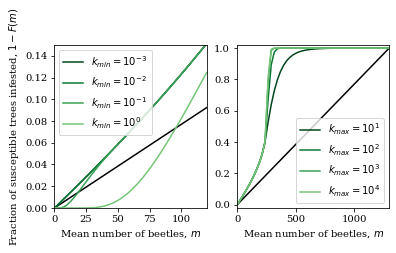

In [20]:
# Plot both
fig,axs = plt.subplots(1,2,figsize=(figsize[0]*2,figsize[0]))
# Plot for a common mrange
for i,(kk,fopt) in enumerate(zip(kminlist,foptkmin)):
    xlim1 = (0,120)
    mr1 = np.linspace(xlim1[0],xlim1[1])
    axs[0].plot(mr1,1-fopt(mr1),c=ck[i],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
    axs[0].set_xlim(xlim1[0],xlim1[1])
    axs[0].set_ylim(0,0.15)
axs[0].plot(mr1,mr1/c,c='k',zorder=-99)
axs[0].legend()
for i,(kk,fopt) in enumerate(zip(kmaxlist,foptkmax)):
    xlim2 = (0,c)
    mr2 = np.linspace(xlim2[0],xlim2[1])
    axs[1].plot(mr2,1-fopt(mr2),c=ck[i],label=r'$k_{{max}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
    axs[1].set_xlim(xlim2[0],xlim2[1])
    axs[1].set_ylim(-0.02,1.02)
axs[1].plot(mr2,mr2/c,c='k',zorder=-99)
axs[1].legend()
# Labels
for ax in axs:
    ax.set_xlabel(r'Mean number of beetles, $m$')
axs[0].set_ylabel(r'Fraction of susceptible trees infested, $1-F(m)$')
fig.savefig('figures/varykminmax.pdf',bbox_inches='tight')

In [21]:
# Get the allee threshold for each kmin and p
mallee_kmin = np.zeros([4,plen])
for i,kk in enumerate(kminlist):
    for j,pp in enumerate(plist):
        # Find fopt
        fopt_temp = sf.getfopt(pp,c,kmin=kk)
        # Find Allee threshold
        mallee_temp = opt.root_scalar(lambda x: x/c - 1 + fopt_temp(x),bracket=[1e-6,3*c/4]).root
        mallee_kmin[i,j] = mallee_temp

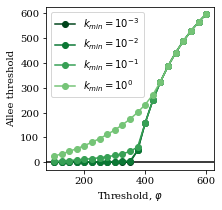

In [22]:
# Plot Allee threshold with kmin varying
fig,ax = plt.subplots(1,1,figsize=figsize)

for i,kk in enumerate(kminlist):
    ax.plot(plist,mallee_kmin[i],'o-',c=ck[i],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
ax.legend()
ax.axhline(0,c='k',zorder=-99)
#ax.set_ylim(0,250)
#ax.set_xlim(90,400)
ax.set_ylabel('Allee threshold')
ax.set_xlabel(r'Threshold, $\varphi$')
fig.savefig('figures/allee_threshold_varykmin.pdf',bbox_inches='tight')

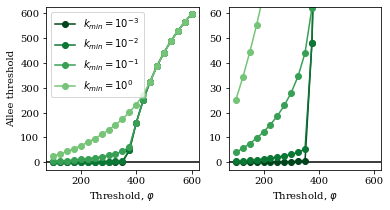

In [23]:
# Plot Allee threshold with smaller y-axis as well
fig,axs = plt.subplots(1,2,figsize=(figsize[0]*2,figsize[0]))

for i,kk in enumerate(kminlist):
    axs[0].plot(plist,mallee_kmin[i],'o-',c=ck[i],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
    axs[1].plot(plist,mallee_kmin[i],'o-',c=ck[i],label=r'$k_{{min}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
axs[0].set_ylabel('Allee threshold')
axs[0].legend()
xlim0 = axs[0].get_xlim()
ylim0 = axs[0].get_ylim()
axs[1].set_ylim([y0*0.1 for y0 in ylim0])
axs[1].set_xlim(xlim0)
for ax in axs:
    ax.axhline(0,c='k',zorder=-99)
    ax.set_xlabel(r'Threshold, $\varphi$')
fig.savefig('figures/allee_threshold_varykmin_alt.pdf',bbox_inches='tight')

In [24]:
# Verify this doesn't change with kmax
mallee_kmax = np.zeros([4,plen])
for i,kk in enumerate(kmaxlist):
    for j,pp in enumerate(plist):
        # Find fopt
        fopt_temp = sf.getfopt(pp,c,kmax=kk)
        # Find Allee threshold
        mallee_temp = opt.root_scalar(lambda x: x/c - 1 + fopt_temp(x),bracket=[1e-6,3*c/4]).root
        mallee_kmax[i,j] = mallee_temp

Text(0.5, 0, 'Threshold, $\\varphi$')

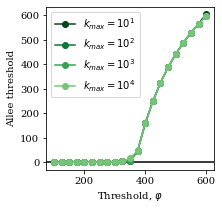

In [25]:
# Plot Allee threshold with kmin varying
fig,ax = plt.subplots(1,1,figsize=figsize)

for i,kk in enumerate(kmaxlist):
    ax.plot(plist,mallee_kmax[i],'o-',c=ck[i],label=r'$k_{{max}}=10^{{{:.0f}}}$'.format(np.log10(kk)))
ax.legend()
ax.axhline(0,c='k',zorder=-99)
#ax.set_ylim(0,250)
#ax.set_xlim(90,400)
ax.set_ylabel('Allee threshold')
ax.set_xlabel(r'Threshold, $\varphi$')
#fig.savefig('figures/allee_threshold_varykmax.pdf',bbox_inches='tight')